<a href="https://colab.research.google.com/github/mona-baharlou/FastAI-HealthyLeafVSUnhealthy/blob/main/HealthyLeafVSDiseasedLeaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Is it a Healthy Leaf?

In [1]:
!pip install duckduckgo-search

from duckduckgo_search import DDGS
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 92.5 MB/s eta 0:00:00


In [2]:
urls = search_images('healthy leaf photos', max_images=1)
urls[0]

/tmp/ipython-input-2383509372.py:6: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


'https://thumbs.dreamstime.com/z/green-healthy-leaf-2754605.jpg'

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importli

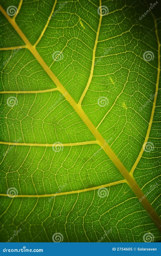

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()


In [3]:
#Visualizing the image:
from fastdownload import download_url
dest = 'healthyleaf.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Now let's do the same with "forest photos":

/tmp/ipython-input-2383509372.py:6: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')


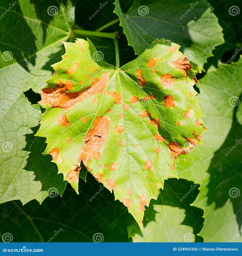

In [4]:
download_url(search_images('diseased leaf photos', max_images=1)[0], 'diseased_leaf.jpg', show_progress=False)
Image.open('diseased_leaf.jpg').to_thumb(256,256)

In [6]:
# Building the Dataset
from pathlib import Path
from fastai.vision.utils import download_images, resize_images

# labels
searches = 'healthy leaf', 'diseased leaf'
# sets the root directory for the dataset to a folder named leaf_health_classifier.
path = Path('leaf_health_classifier')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    #  to avoid overwhelming servers and getting blocked
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

/tmp/ipython-input-2383509372.py:6: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7a

In [7]:
# verify_images: checks the integrity of the downloaded images. It identifies any files that are corrupt or unreadable.
# get_image_files: returns a list of all image files in the path directory.
failed = verify_images(get_image_files(path))
#  takes the list of failed images and uses the unlink method to delete them from the file system
failed.map(Path.unlink)
# number of failed images
len(failed)

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7afdb304e660>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7afdb2744280>
  self.pid = os.fork()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7afdb304e660>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: R

0

To train a model, we'll need `DataLoaders`, which is an object that contains a *training set* (the images used to create a model) and a *validation set* (the images used to check the accuracy of a model -- not used during training). In `fastai` we can create that easily using a `DataBlock`, and view sample images from it:

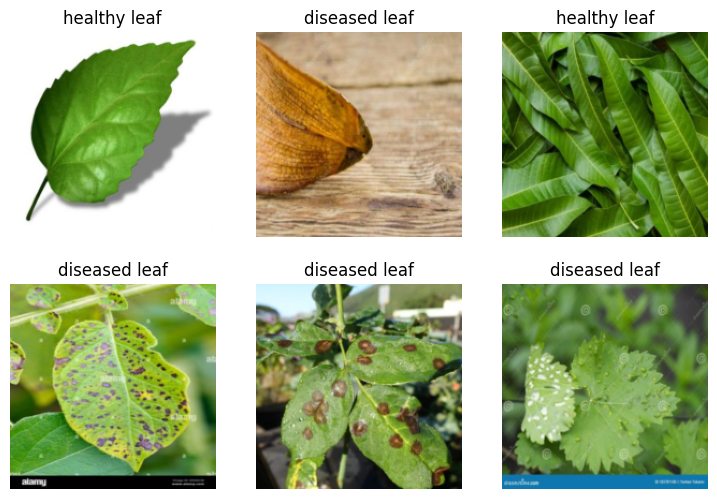

In [8]:
#  DataBlock(): how to get data and prepare it for a machine learning model
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), # Specifies that the input data is an image and the output is a category
    get_items=get_image_files, # the function to use to find the files
    splitter=RandomSplitter(valid_pct=0.2, seed=42), # splits the dataset into a training set and a validation set. seed=42 ensures the split is reproducible
    get_y=parent_label, # automatically infers the label of an image from the name of its parent folder
    item_tfms=[Resize(192, method='squish')] # applies transformations to each image. It resizes every image to 192x192 pixels, using the 'squish' method to force the image into the new dimensions.
).dataloaders(path, bs=32) #  is responsible for loading the data in batches during training. bs=32 means the model will be trained on batches of 32 images at a time.

#  displays a small batch of images and their labels, providing a final check to ensure the data is loaded correctly before training
dls.show_batch(max_n=6)

In [9]:
# Model Training

# vision_learner: the central class in fastai for training
learn = vision_learner(dls, resnet18, metrics=error_rate)
#  start the training process
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 220MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.996386,0.653178,0.223881,00:02


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7afdb304e660>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7afdb2744280>
  self.pid = os.fork()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed soc

epoch,train_loss,valid_loss,error_rate,time
0,0.413337,0.269748,0.104478,00:01
1,0.323098,0.232058,0.044776,00:01
2,0.246962,0.252759,0.074627,00:02


<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7afdb304e660>
  self.pid = os.fork()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed socket <zmq.Socket(zmq.PUSH) at 0x7afdb2744280>
  self.pid = os.fork()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
/usr/lib/python3.11/multiprocessing/popen_fork.py:66: ResourceWarning: Unclosed soc

In [10]:
# PILImage(): loads the healthyleaf.jpg image that was downloaded in the very first step.
# .predict(): uses the trained model to make a prediction on the new image
healthy_leaf,_,probs = learn.predict(PILImage.create('healthyleaf.jpg'))
healthy_leaf_index = learn.dls.vocab.o2i['healthy leaf']

print(f"This is a: {healthy_leaf}.")
print(f"Probability it's a healthy leaf: {probs[healthy_leaf_index]:.4f}")

This is a: healthy leaf.
Probability it's a healthy leaf: 1.0000
